In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Load the dataset

In [3]:
df = pd.read_csv("/content/nearest-earth-objects(1910-2024).csv")
df.head(5)

<ipython-input-3-e1c2218b616e>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/nearest-earth-objects(1910-2024).csv")


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


Display basic info and first few rows

In [4]:
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73266 entries, 0 to 73265
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neo_id                  73266 non-null  int64  
 1   name                    73266 non-null  object 
 2   absolute_magnitude      73266 non-null  float64
 3   estimated_diameter_min  73266 non-null  float64
 4   estimated_diameter_max  73266 non-null  float64
 5   orbiting_body           73266 non-null  object 
 6   relative_velocity       73266 non-null  float64
 7   miss_distance           73266 non-null  float64
 8   is_hazardous            73265 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 5.0+ MB
None
    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  24554

Handling missing values

In [5]:
df.dropna(inplace=True)

EDA - Plot hazardous vs non-hazardous

<ipython-input-8-06a2e74b39f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["is_hazardous"], palette=["green", "yellow"])


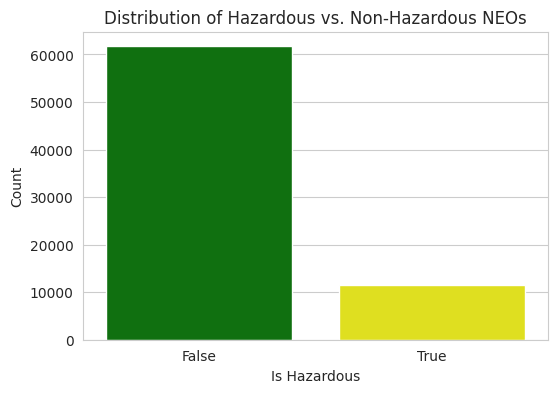

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x=df["is_hazardous"], palette=["green", "yellow"])
plt.title("Distribution of Hazardous vs. Non-Hazardous NEOs")
plt.xlabel("Is Hazardous")
plt.ylabel("Count")
plt.show()

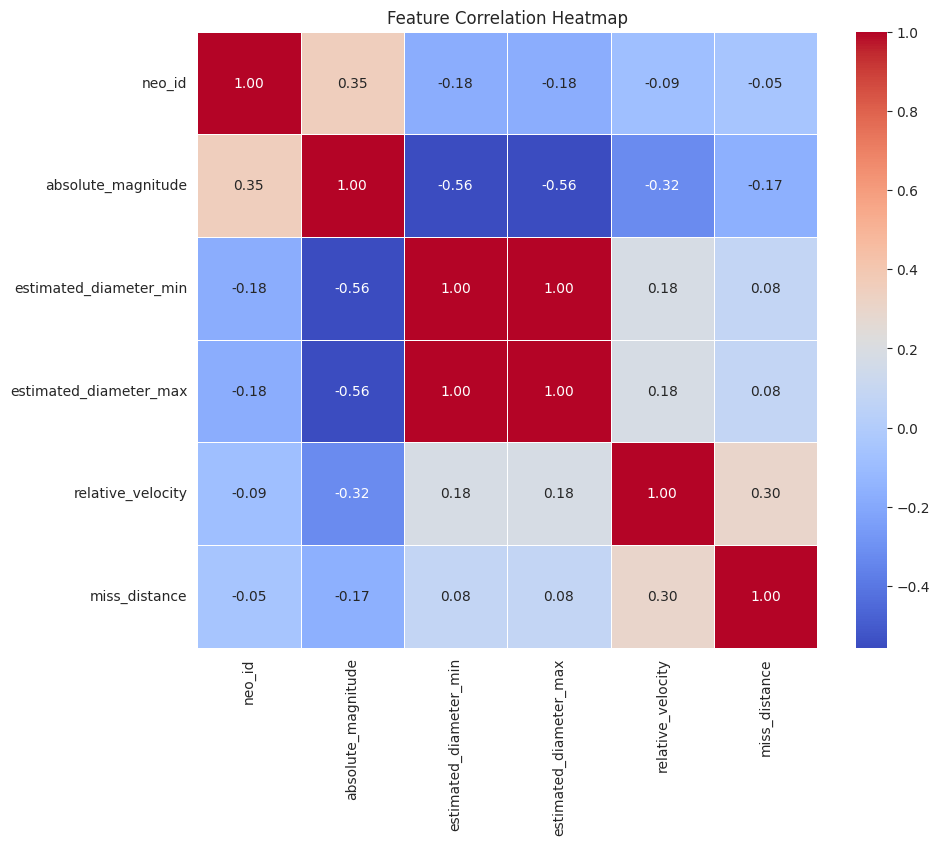

In [9]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


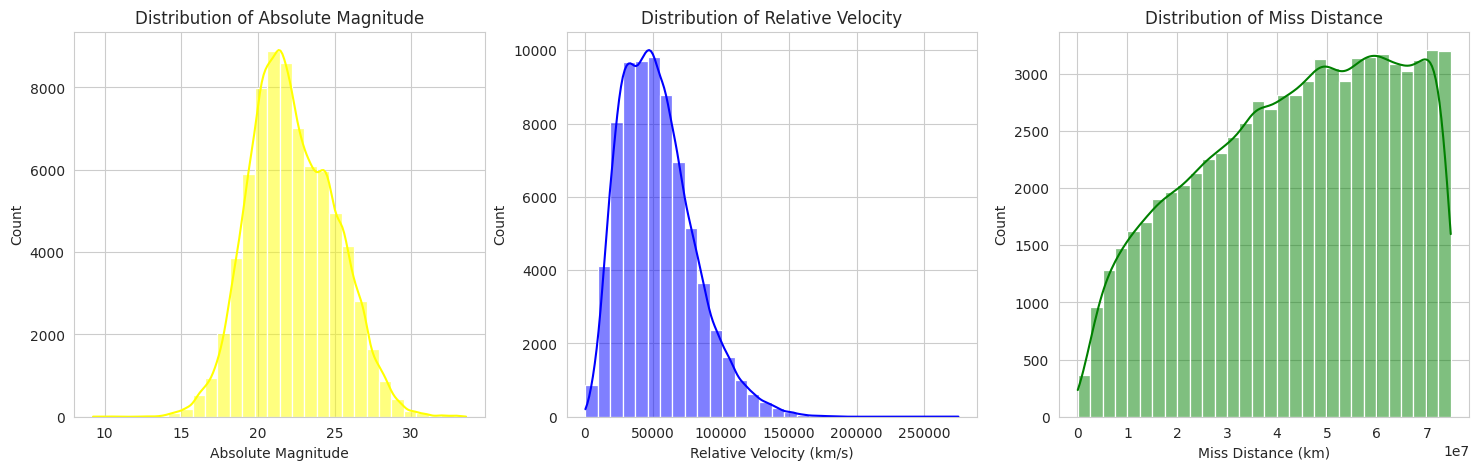

In [11]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["absolute_magnitude"], bins=30, kde=True, ax=axes[0], color="yellow")
axes[0].set_title("Distribution of Absolute Magnitude")
axes[0].set_xlabel("Absolute Magnitude")
sns.histplot(df["relative_velocity"], bins=30, kde=True, ax=axes[1], color="blue")
axes[1].set_title("Distribution of Relative Velocity")
axes[1].set_xlabel("Relative Velocity (km/s)")
sns.histplot(df["miss_distance"], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title("Distribution of Miss Distance")
axes[2].set_xlabel("Miss Distance (km)")
plt.show()


Feature Engineering

In [12]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
X = df.drop(columns=["is_hazardous"])
y = df["is_hazardous"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(df.head())
print(y_train_resampled.value_counts())

    neo_id   name  absolute_magnitude  estimated_diameter_min  \
0  2162117  12462               19.14                0.394962   
1  2349507  13169               18.50                0.530341   
2  2455415  13812               21.45                0.136319   
3  3132126    416               20.63                0.198863   
4  3557844   2472               22.70                0.076658   

   estimated_diameter_max  orbiting_body  relative_velocity  miss_distance  \
0                0.883161              0       71745.401048   5.814362e+07   
1                1.185878              0      109949.757148   5.580105e+07   
2                0.304818              0       24865.506798   6.720689e+07   
3                0.444672              0       78890.076805   3.039644e+07   
4                0.171412              0       56036.519484   6.311863e+07   

   is_hazardous  
0             0  
1             1  
2             0  
3             0  
4             0  
is_hazardous
0    49374
1    493

Random Forest

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())


is_hazardous
0    49374
1    49374
Name: count, dtype: int64


In [15]:
rf_model = RandomForestClassifier(
    n_estimators=20,
    max_depth=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" AUC-ROC: {auc:.4f}")



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


 Accuracy: 0.7394
 Precision: 0.3753
 Recall: 0.9504
 F1 Score: 0.5382
 AUC-ROC: 0.8248


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished
